# Mini Project #2: MNIST Analysis

An easy-to-follow scikit-learn tutorial that will help you to get started with the Python machine learning.

## Machine Learning with Python

Machine learning is a branch in computer science that studies the design of algorithms that can learn.

Typical tasks are concept learning, function learning or “predictive modeling”, clustering and finding predictive patterns. These tasks are learned through available data that were observed through experiences or instructions, for example.

The hope that comes with this discipline is that including the experience into its tasks will eventually improve the learning. But this improvement needs to happen in such a way that the learning itself becomes automatic so that humans like ourselves don’t need to interfere anymore is the ultimate goal.

Today’s scikit-learn tutorial will introduce you to the basics of Python machine learning:

- Part 1: You'll learn how to use Python and its libraries to explore your data with the help of matplotlib and Principal Component Analysis (PCA),
- Part 2a: And you'll preprocess your data with normalization and you'll split your data into training and test sets.
- Part 2b: Next, you'll work with the well-known KMeans algorithm to construct an unsupervised model, fit this model to your data, predict values, and validate the model that you have built.
- Part 3: As an extra, you'll also see how you can also use Support Vector Machines (SVM) to construct another model to classify your data.

Let's start with Part 1 now.

## Loading Your Data Set
The first step to about anything in data science is loading in your data. This is also the starting point of this scikit-learn tutorial.

This discipline typically works with observed data. This data might be collected by yourself or you can browse through other sources to find data sets. But if you’re not a researcher or otherwise involved in experiments, you’ll probably do the latter.

If you’re new to this and you want to start problems on your own, finding these data sets might prove to be a challenge. However, you can typically find good data sets at the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets) or on the [Kaggle](https://www.datacamp.com/community/tutorials/www.kaggle.com) website. Also, check out this [KD Nuggets list with resources](http://www.kdnuggets.com/datasets/index.html).

__NOTE__: the MNIST(DIGIT) dataset is one of the most famous data sets in the machine learning context - if you are going to take BA 550, you will see this dataset in deep learning again.

Note that the datasets module contains other methods to load and fetch popular reference datasets, and you can also count on this module in case you need artificial data generators. In addition, this data set is also available through the UCI Repository that was mentioned above: you can find the data [here](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/).

If you would have decided to pull the data from the latter page, your data import would’ve looked like this:

In [112]:
# Import the `pandas` library as `pd`
import pandas as pd
import pandas as np
# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
# since `digits` is now a dataframe (without the meta data), we can just look at the first five rows using .head()
digits.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


Note that if you download the data like this, the data is already split up in a __training__ and a __test set__, indicated by the extensions __.tra__ and __.tes__. You’ll need to load in both files to elaborate your project. With the command above, you only load in the __training set__.

Please write your own code below to download the __test set__.

In [125]:
# test set URL: http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes
# use `read_csv()` again, and name the dataframe as `digits_test`
digits_test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes')
# you can check the first 5 rows of `digit_test` to make sure you have downloaded in correctly
digits_test.head(5)

,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
4,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5


With the help of `scikit-learn`, you do not have to download any data since the DIGITS dataset is pre-loaded in it. You can just load it from `scikit-learn`.

Fun fact: did you know the name originates from the fact that this library is a scientific toolbox built around SciPy? By the way, there is [more than just one scikit](https://scikits.appspot.com/scikits) out there. This scikit contains modules specifically for machine learning and data mining, which explains the second component of the library name. :)

To load in the data, you import the module `datasets` from `sklearn`. Then, you can use the `load_digits()` method from `datasets` to load in the data:

In [126]:
# Import `datasets` from `sklearn`
from sklearn import datasets 
# Load in the `digits` data using load_digits() as `digits`
digits = datasets.load_digits()
# Print the `digits` data 
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


A little bit background of the DIGITS dataset: Did you notice that the dataset has `64` features? That is because the dataset contains processed images of hand-written digits. These images are `8x8` in dimensions. By processing, the value of an instance under each feature is the gray-scale of that cell in the original image. Do not worry we will restore some of these images later on.

Fun fact: the MNIST dataset used with deep learning contains hand-written digits in 28x28 dimensions (784 features). 

The class/target of the dataset contains `[0, 9]` a total of 10 numbers. The idea is that any image is corresponding to a number in `[0, 9]`.

## Exploratory Data Analysis (EDA)

When first starting out with a data set, it’s always a good idea to go through the data description and see what you can already learn. When it comes to `scikit-learn`, you don’t immediately have this information readily available, but in the case where you import data from another source, there's usually a data description present, which will already be a sufficient amount of information to gather some insights into your data.

However, these insights are not merely deep enough for the analysis that you are going to perform. You really need to have a good working knowledge about the data set.

Performing an exploratory data analysis (EDA) on a data set like the one that this tutorial now has might seem difficult.

Where do you start exploring these handwritten digits?

### Gathering Basic Information on Your Data
Let’s say that you haven’t checked any data description folder (or maybe you want to double-check the information that has been given to you).

Then you should start with gathering the basic information.

When you printed out the `digits` data after having loaded it with the help of the `scikit-learn` `datasets` module, you will have noticed that there is already a lot of information available. You already have knowledge of things such as the target values and the description of your data. You can access the `digits` data through the attribute `data`. Similarly, you can also access the target values or labels through the target attribute and the description through the `DESCR` attribute.

To see which keys you have available to already get to know your data, you can just run `digits.keys()`.

In [127]:
# Get the keys of the `digits` data
print(digits.keys())
# Print out the data
print(digits.data)
# Print out the target values
print(digits.target)
# Print out the description `DESCR` of the `digits` data
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extra

Let's look at some of the images, say first three, using `digits.images[:3]`.

In [128]:
print(digits.images[:3])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]]


Wait... We were expecting images, right? What are these numbers and matrices again? Remember these are processed images, you will need tools to restore them back to their original form.

The next thing that you can (double)check is the type of your data.

If you used `read_csv()` to import the data, you would have had a data frame that contains just the data. There wouldn’t be any description component, but you would be able to resort to, for example, `head()` or `tail()` to inspect your data. In these cases, it’s always wise to read up on the data description folder!

However, this tutorial assumes that you make use of the library's data and the type of the digits variable is not that straightforward if you’re not familiar with the library. Look at the print out in the first code chunk. You’ll see that digits actually contains `numpy arrays`!

This is already quite some important information. But how do you access these arays?

It’s very easy, actually: you use attributes to access the relevant arrays.

Remember that you have already seen which attributes are available when you printed `digits.keys()`. For instance, you have the `data` attribute to isolate the data, `target` to see the target values and the `DESCR` for the description, …

But what then?

The first thing that you should know of an array is its shape. That is, the number of dimensions and items that is contained within an array. The array’s shape is a tuple of integers that specify the sizes of each dimension. In other words, if you have a 3d array like this y = np.zeros((2, 3, 4)), the shape of your array will be (2,3,4).

Now let’s try to see what the shape is of these three arrays that you have distinguished (the `data`, `target` and `DESCR` arrays).

Use first the `data` attribute to isolate the numpy array from the digits data and then use the `shape` attribute to find out more. You can do the same for the `target` and `DESCR`. Again, we will deal with the `images` attribute later.

In [129]:
# import `numpy` as `np`
import numpy as np
# Isolate the `digits` data
digits_data = digits.data
# Inspect the shape
print(digits_data.shape)
# Isolate the target values with `target`
digits_target = digits.target
# Inspect the shape
print(digits_target.shape)
# Print the number of unique labels
number_digits = len(np.unique(digits.target))
# Isolate the `images`
digits_images = digits.images
# Inspect the shape
print(digits_images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


### Answer the question: 

Use your `numpy` knowledege, and other knowledge you gained in this class, to interpret what above dimensions mean. For instance, we already talked about the `64` in the `data` dimensions means each instance in our dataset has `64` features.

Provide your interpretations in the block below.

__These are the number of columns and rows in the dataframe__.

One thing you may notice is taht the `target` attribute only have `1` dimension value, what does that mean?

But all those target values contain `10` unique values, namely, from 0 to 9. In other words, all `1797` target values are made up of numbers that lie between 0 and 9. This means that the digits that your model will need to recognize are numbers from 0 to 9.

For the `images` attributs, you can visually check that the images and the data are related by reshaping the images array to two dimensions: `digits.images.reshape((1797, 64))`.

But if you want to be completely sure, better to check with:

In [130]:
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


With the `numpy` method `all()`, you test whether all array elements along a given axis evaluate to `True`. In this case, you evaluate if it’s true that the reshaped `images` array equals `digits.data`. You’ll see that the result will be `True` in this case.

### Visualize Your Data Images With matplotlib
Then, you can take your exploration up a notch by visualizing the images that you’ll be working with. You can use one of Python’s data visualization libraries, such as `matplotlib`, for this purpose:

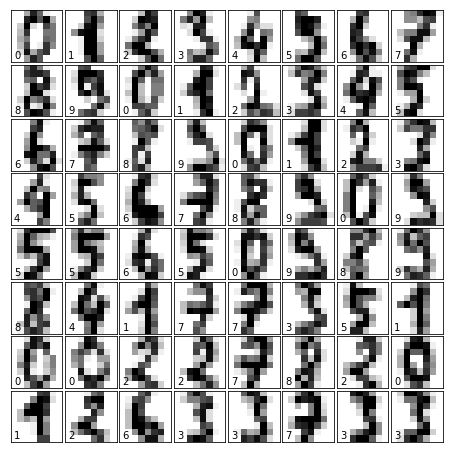

In [131]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

The code chunk seems quite lengthy at first sight and this might be overwhelming. But, what happens in the code chunk above is actually pretty simple once you break it down into parts:

- You import `matplotlib.pyplot`.
- Next, you set up a figure `fig` with a figure size of `6` inches wide and `6` inches long. This is your blank canvas where all the subplots with the images will appear.
- Then you go to the level of the subplots to adjust some parameters: you set the left side of the suplots of the figure to `0`, the right side of the suplots of the figure to `1`, the bottom to `0` and the top to `1`. The height of the blank space between the suplots is set at `0.005` and the width is set at `0.05`. These are merely layout adjustments.
- After that, you start filling up the figure that you have made with the help of a `for` loop.
- You initialize the suplots one by one, adding one at each position in the grid that is 8 by 8 images big.
- You display each time one of the images at each position in the grid. As a color map, you take binary colors, which in this case will result in gray-scale (black, gray values and white colors, __higher value means darker color__). The interpolation method that you use is 'nearest', which means that your data is interpolated in such a way that it isn’t smooth. You can see the effect of the different interpolation methods [here](http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html).
- The cherry on the pie is the addition of text to your subplots. The target labels are printed at coordinates (0,7) of each subplot, which in practice means that they will appear in the bottom-left of each of the subplots.
- Don’t forget to show the plot with `plt.show()`!

On a more simple note, you can also visualize the target labels with an image, just like this:

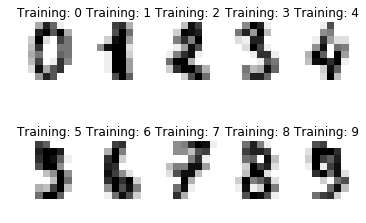

In [132]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:10]):
    # initialize a subplot of 2X5 at the (i+1)-th position
    plt.subplot(2, 5, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

Note that in this case, you zip the two `numpy` arrays (`images` and `target`, aka. `labels`) together and save it into a variable called `images_and_labels`. You’ll see now that this list contains suples of each time an instance of `digits.images` and a corresponding `digits.target` value.

Then, you say that for the first eight elements of `images_and_labels` -note that the index starts at 0!-, you initialize subplots in a grid of `2` by `4` at each position. You turn of the plotting of the axes and you display images in all the subplots with a color map `plt.cm.gray_r` (which returns all grey colors) and the interpolation method used is `nearest`. You give a title to each subplot, and you show it.

Not too hard, huh?

And now you know a very good idea of the data that you’ll be working with!

### Visualizing Your Data: Principal Component Analysis (PCA)

But is there no other way to visualize the data?

As the digits data set contains 64 features, this might prove to be a challenging task. You can imagine that it’s very hard to understand the structure and keep the overview of the digits data. In such cases, it is said that you’re working with a __high dimensional__ data set.

High dimensionality of data is a direct result of trying to describe the objects via a collection of features. Other examples of high dimensional data are, for example, financial data, climate data, neuroimaging, survey data …

But, as you might have gathered already, this is not always __easy__. In some cases, high dimensionality can be problematic, as your algorithms will need to take into account too many features. In such cases, you speak of the __curse of dimensionality__. Because having a lot of dimensions can also mean that your data points are __far away__ from virtually every other point, which makes the distances between the data points uninformative. In other words, you will need __much more__ data points to find reasonable patterns from your data.

But don’t worry, though, because the __curse of dimensionality__ is not simply a matter of counting the number of features. There are also cases in which the effective dimensionality might be much smaller than the number of the features, such as in data sets where some features are irrelevant. In other words, it is __safe__ to filter out some of the features that are not as useful.

In addition, you can also understand that data with only two or three dimensions is easier to grasp and can also be visualized easily.

That all explains why you’re going to visualize the data with the help of one of the __Dimensionality Reduction__ techniques, namely __Principal Component Analysis (PCA)__. The idea in PCA is to find a *linear combination* of the  variables that contains most of the information. This new variable or “principal component” can replace the  original variables.

In short, it’s a linear transformation method that yields the directions (principal components) that maximize the __variance__ of the data. Remember that the variance indicates how far a set of data points lie apart. If you want to know more, go to [this page](http://www.lauradhamilton.com/introduction-to-principal-component-analysis-pca).

You can easily apply PCA do your data with the help of `scikit-learn`:

In [133]:
# import  `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
# name the model as `randomized_pca`, using the `PCA` function 
# with the parameter of `n_components` set to 2 and `svd_solver` set to `randomized`
randomized_pca =PCA(n_components =2,svd_solver ='randomized')

# Fit and transform the data to the model
# using the `fit_transform` function and name the result as `reduced_data_rpca`
reduced_data_rpca =PCA.fit_transform(randomized_pca,digits.data)
reduced_data_rpca

# Create a regular PCA model 
# name the model as `pca`, using the `PCA` function with the parameter of `n_components` set to 2
pca =PCA(n_components =2)

# Fit and transform the data to the model
# using the `fit_transform` function and name the result as `reduced_data_pca`
reduced_data_pca =PCA.fit_transform(pca,digits.data)

# Inspect the shape of `reduced_data_pca`
print(reduced_data_pca.shape)

# Print out both reduced data
# I don't know how to do this....


(1797, 2)


The reason we build a randomized PCA model is that it typically perform better than the regular PCA model. Try replacing the randomized PCA model or estimator object with a regular PCA model and see what the difference is.

Note how you explicitly tell the model to only keep `2` components. This is to make sure that you have two-dimensional data to plot. Also, note that you don’t pass the target class with the labels to the PCA transformation because you want to investigate if the PCA reveals the distribution of the different labels and if you can clearly separate the instances from each other.

You can now build a scatterplot to visualize the data:

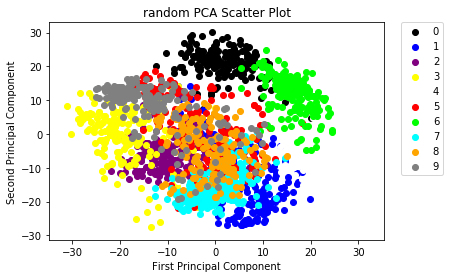

In [134]:
# Define the colors for different classes/labels [0, 9]
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

# We are using the two components in the `randomized_rpca` model as x-axis and y-axis in the plot
# Note that we are plotting the data points, not the original figures
# The distance in the plot actually means the distance between the data points
# i.e. two data points of class (0) should be close to each other
for i in range(len(colors)):
    # x-axis is the first component in `reduced_data_rpca` model
    # and the color is corresponding to class, e.g., 0 is `black`
    x = reduced_data_rpca[:, 0][digits.target == i]
    # x-axis is the second component in `reduced_data_rpca` model
    y = reduced_data_rpca[:, 1][digits.target == i]
    # plot it out
    plt.scatter(x, y, c=colors[i])
# add legend as class names
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# add x-axis name as 'First Principal Component'
plt.xlabel('First Principal Component')
# add y-axis name as 'Second Principal Component'
plt.ylabel('Second Principal Component')
# add title of plot as "random PCA Scatter Plot"
plt.title("random PCA Scatter Plot")
plt.show()

Again you use `matplotlib` to visualize the data. It’s good for a quick visualization of what you’re working with, but you might have to consider something a little bit more fancy if you’re working on making this part of your data science portfolio.

Also note that the last call to show the plot (`plt.show()`) is not necessary if you’re working in Jupyter Notebook, as you’ll want to put the images inline (using magic command `%matplotlib inline`). When in doubt, you can always check out our [Definitive Guide to Jupyter Notebook](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook/).

What happens in the code chunk above is the following:

1. You put your colors together in a list. Note that you list ten colors, which is equal to the number of labels that you have. This way, you make sure that your data points can be colored in according to the labels. Then, you set up a range that goes from 0 to 10. Mind you that this range is not inclusive! Remember that this is the same for indices of a list, for example.
2. You set up your `x` and `y` coordinates. You take the first or the second column of `reduced_data_rpca`, and you select only those data points for which the label equals the index that you’re considering. That means that in the first run, you’ll consider the data points with label `0`, then label `1`, … and so on.
3. You construct the scatter plot. Fill in the `x` and `y` coordinates and assign a color to the batch that you’re processing. The first run, you’ll give the color black to all data points, the next run blue, … and so on.
4. You add a legend to your scatter plot. Use the `target_names` key to get the right labels for your data points.
5. Add labels to your `x` and `y` axes that are meaningful.
5. Reveal the resulting plot.

### DO IT YOURSELF
As you remember, we also build a regular PCA model `pca` using the digits data - which results in as `reduced_data_pca`. Use this to replace `reduced_data_rpca` in above code block and visualize the results again.

Text(0.5,1,'PCA Scatter Plot')

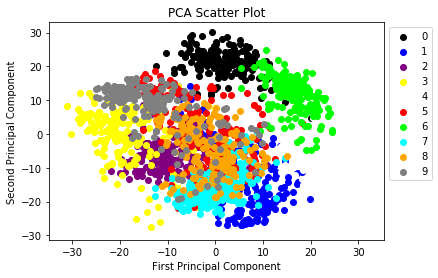

In [135]:
# complete the code below
# you will use the same `colors` list so you do not have to define it again
# We are using the two components in the `randomized_pca` model as x-axis and y-axis in the plot
# Note that we are plotting the data points, not the original figures
# The distance in the plot actually means the distance between the data points
# i.e. two data points of class (0) should be close to each other
for a in range(len(colors)):
    # x-axis is the first component in `reduced_data_pca` model
    # and the color is corresponding to class, e.g., 0 is `black`
    # x-axis is the second component in `reduced_data_pca` model
    x = reduced_data_pca[:, 0][digits.target == a]
    y = reduced_data_pca[:, 1][digits.target == a] 
    # plot it out
    plt.scatter(x, y, c=colors[a]) # colors referenced was the same used before
# add legend as class names
plt.legend(digits.target_names, bbox_to_anchor=(1,1))
# add x-axis name as 'First Principal Component'
plt.xlabel('First Principal Component')
# add y-axis name as 'Second Principal Component'
plt.ylabel('Second Principal Component')
# add title of plot as "PCA Scatter Plot"
plt.title('PCA Scatter Plot')

### Answer the question

Can you observe the difference between using the `PCA` and `random PCA` models? Use the next code block to provide your answer.

__The distribution of both PCA and random PCA look to be almost the same, if not identical. Maybe this was on purpose for the point of making an example through this exercise, however its probably not always like this. I would think a larger data set to be working with or with a wider distribution (more outliers) before making the normalization or standardization would make a difference.__.

We will save both `reduced_data_pca` and `reduced_data_rpca` models to disk so that we can re-use them in Part 2 of this mini project. Code below does that.

In [136]:
np.save('../ba545-data/reduced_data_pca.npy', reduced_data_pca)
np.save('../ba545-data/reduced_data_rpca.npy', reduced_data_rpca)

# This doesn't work, I don't know why....

FileNotFoundError: [Errno 2] No such file or directory: '../ba545-data/reduced_data_pca.npy'

That's all for part 1. Please make sure your sync the complete notebook to your github repo for submission.